# Churn &mdash; EDA

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Churn"

COLAB = 'google.colab' in sys.modules
if COLAB:
    ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
else:
    ROOT = "./"

DEBUG = False
SEED = 666

C:\Users\ichig\AppData\Local\Temp\ipykernel_16960\250077564.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [2]:
if COLAB:
    from google.colab import drive
    if not os.path.isdir("/content/gdrive"):
        drive.mount("/content/gdrive")

## Load Dataset

In [3]:
df = pd.read_pickle(f"{ROOT}/data/data.pkl")
print(df.shape)
df.head()

(7032, 20)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA - Target

In [4]:
target = "Churn"
df[target].value_counts(dropna=False, normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

**Comments**
 * Target `Churn` is categorical so we have a classification problem. Only two levels so is a binary classification.
 * Problem is unblaanced 73% No and 27% Yes, so a dumb classifier will predict correctly 73% of the time when using accuracy as the metric.
 * Should consider better metric, and will use stratification when doing the train/test split. 

## EDA - Categorical Features

In [5]:
columns = list(df.select_dtypes("category").columns)
columns.remove(target)
print(columns)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Gender

Male      3549
Female    3483
Name: Gender, dtype: int64

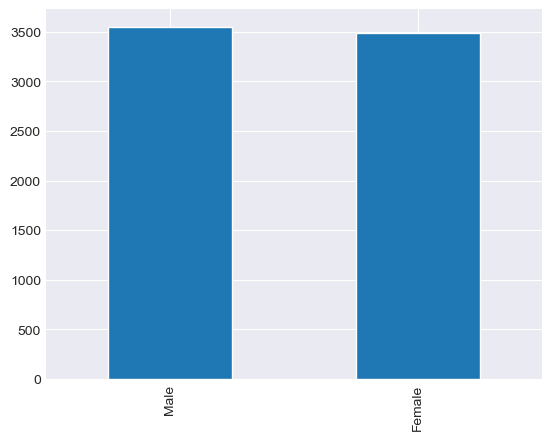

### SeniorCitizen

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

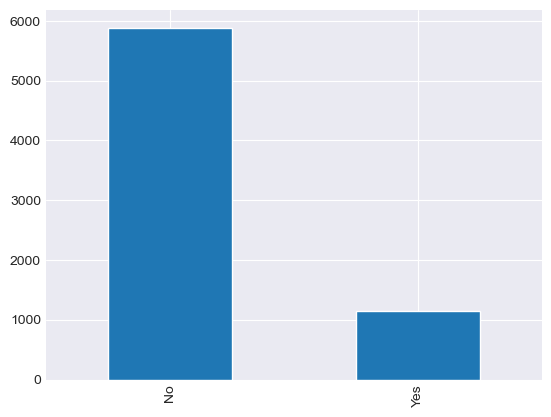

### Partner

No     3639
Yes    3393
Name: Partner, dtype: int64

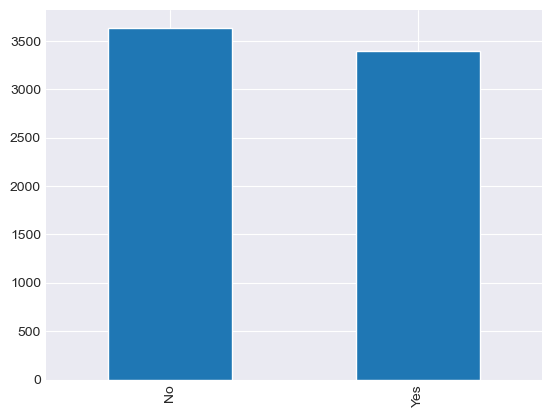

### Dependents

No     4933
Yes    2099
Name: Dependents, dtype: int64

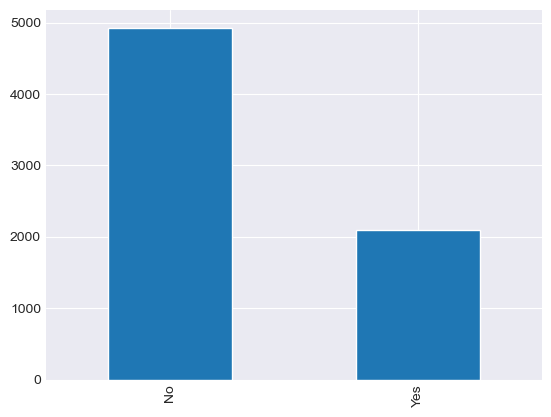

### PhoneService

Yes    6352
No      680
Name: PhoneService, dtype: int64

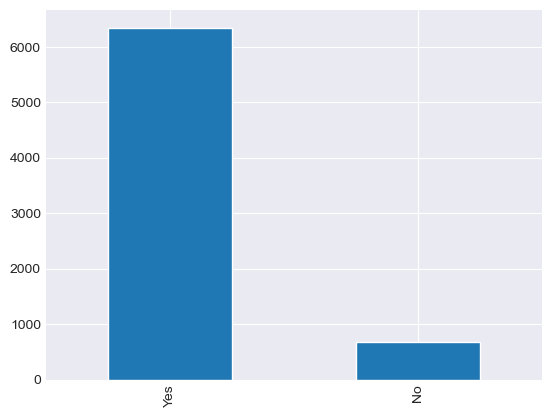

### MultipleLines

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

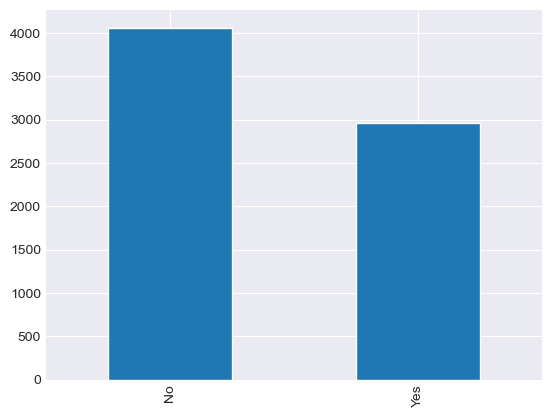

### InternetService

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

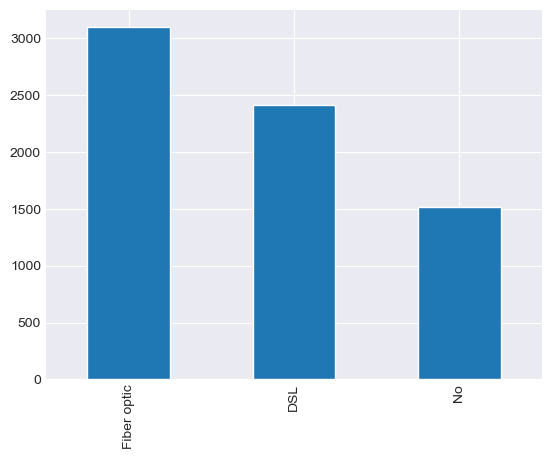

### OnlineSecurity

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

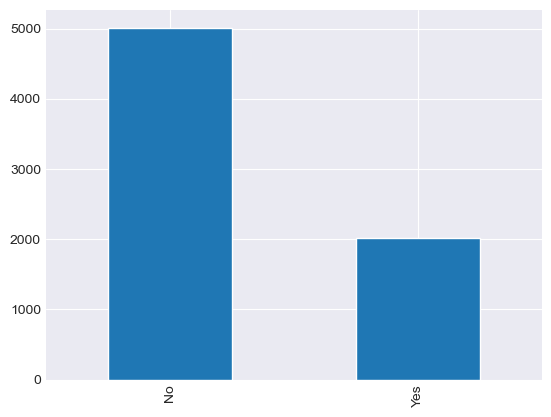

### OnlineBackup

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

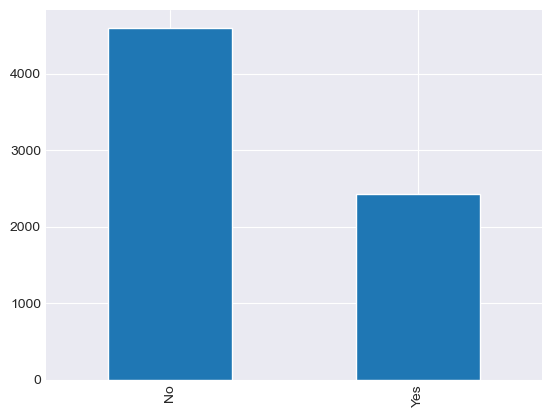

### DeviceProtection

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

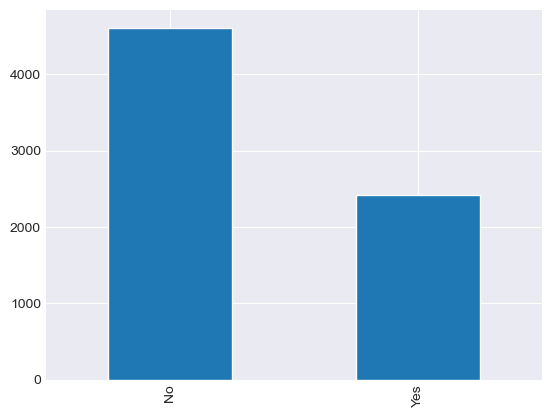

### TechSupport

No     4992
Yes    2040
Name: TechSupport, dtype: int64

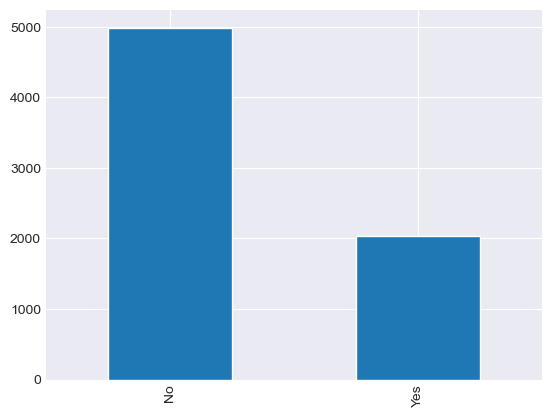

### StreamingTV

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

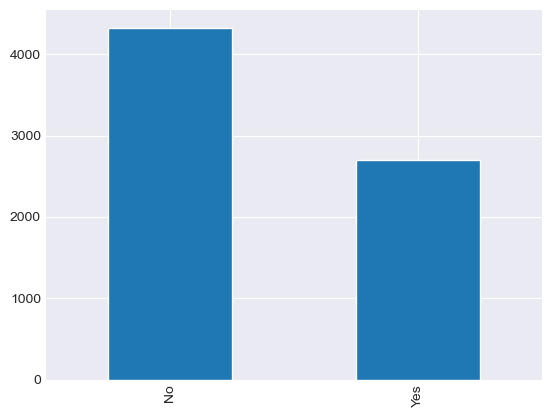

### StreamingMovies

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

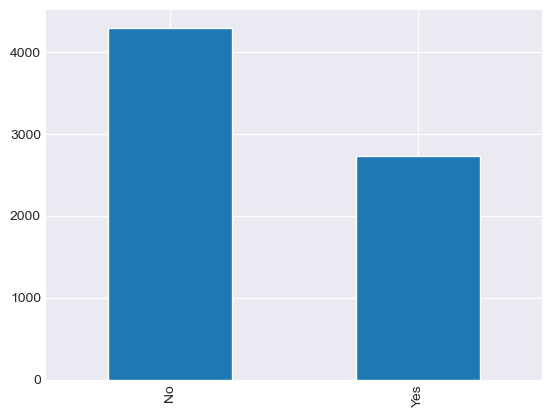

### Contract

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

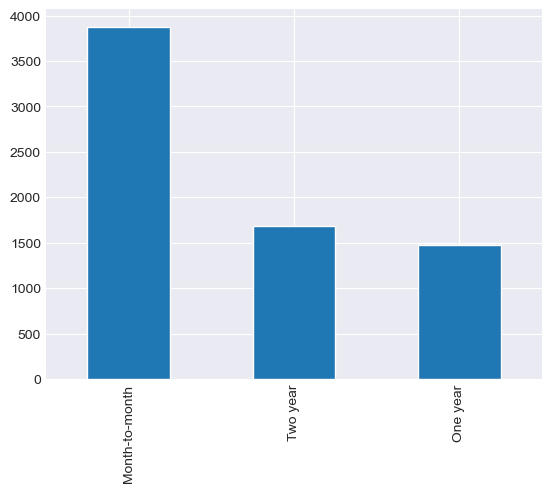

### PaperlessBilling

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

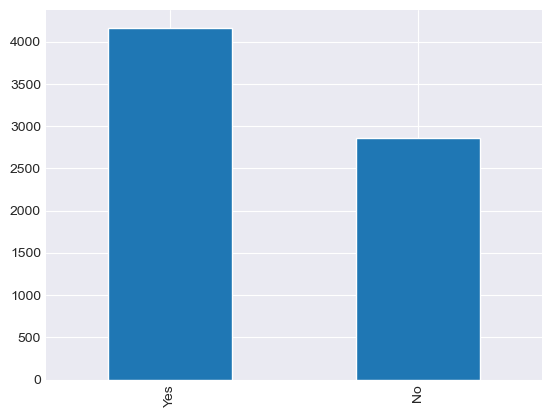

### PaymentMethod

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

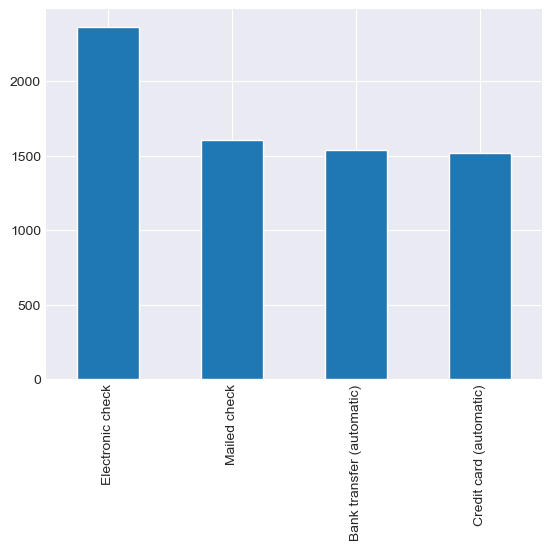

In [6]:
for c in columns:
    display(Markdown(f"### {c}"))
    display(df[c].value_counts(dropna=False))
    df[c].value_counts(dropna=False).plot(kind="bar")
    plt.show()

**Comments**
 
 * All categorical features are usable, and none need corrections (rare levels, etc)df.Contract

## EDA - Numerical Features

In [7]:
columns = list(df.select_dtypes(["int","float"]).columns)
print(columns)

['Tenure', 'MonthlyCharges', 'TotalCharges']


### Tenure

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

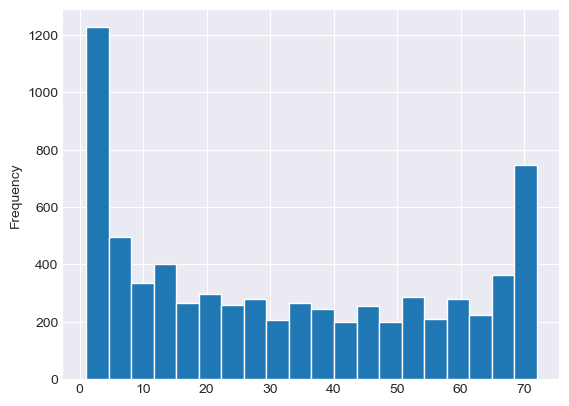

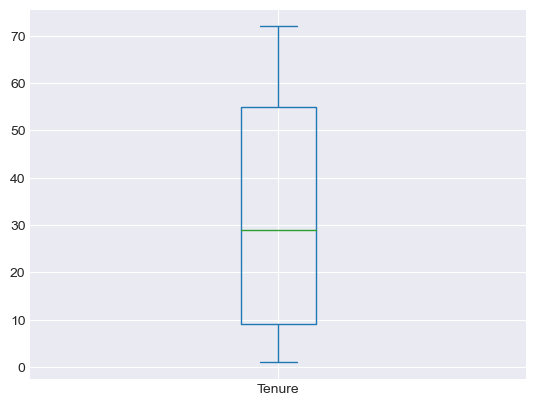

### MonthlyCharges

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

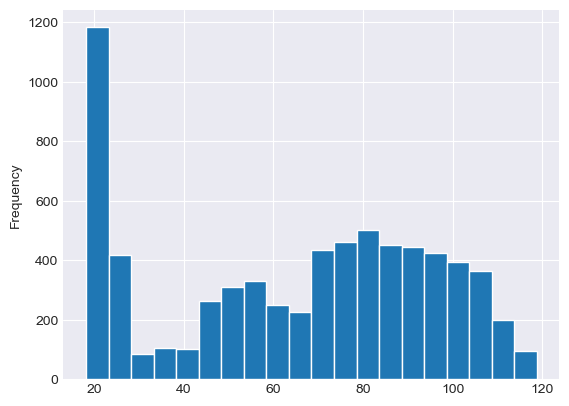

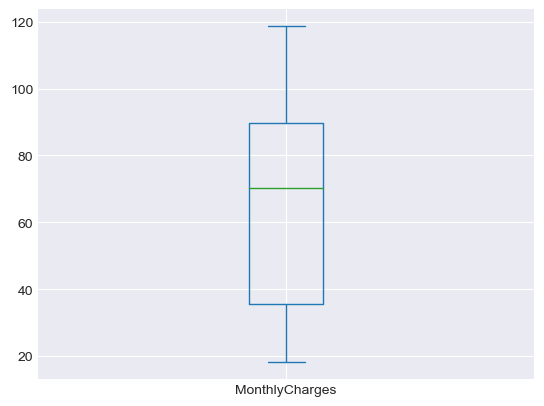

### TotalCharges

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

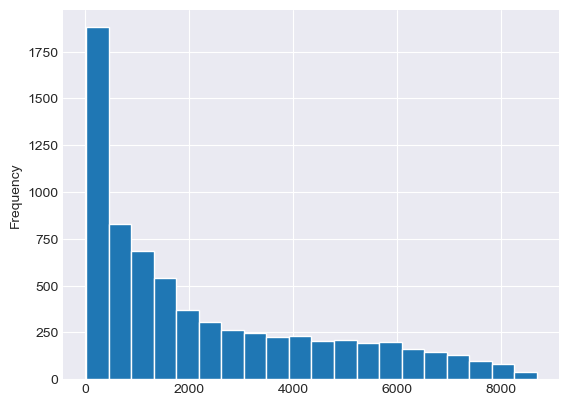

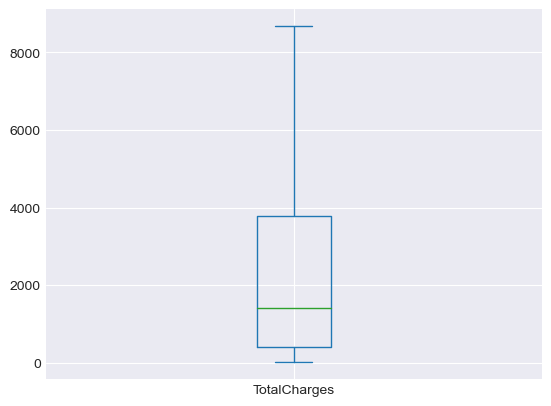

In [8]:
for c in columns:
    display(Markdown(f"### {c}"))
    display(df[c].describe())
    df[c].plot(kind="hist", bins=20)
    plt.show()
    df[c].plot(kind="box")
    plt.show()

**Comments**

 * `Tenure` is not normaly distributed but this is not an issue if using decision-tree classifiers, more of a problem for logistic regression as breaks model assumptions but probably won't affect model performance.
 * `MonthlyCharges` has a bin with large frequency at lower end. Suggests creating a binary feature to represent those cases.
 * `TotalCharges` is right skewed, so may come back to transform this later.
 
 * No features had outliers.